In [6]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# load image
img = cv2.imread("../data/text1.jpg")


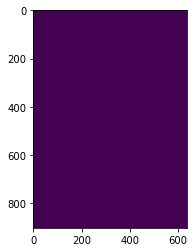

In [16]:
# use morphology open to remove thin lines from dotted lines
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)
plt.imshow(morph)

In [25]:

# write result to disk
cv2.imwrite("text_above_lines_threshold.png", thresh)
cv2.imwrite("text_above_lines_morph.png", morph)
cv2.imwrite("text_above_lines_lines.jpg", result)


True

In [27]:
def detect_lines(gray):
    # convert to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # threshold the grayscale image
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # use morphology erode to blur horizontally
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)
    
    # find contours
    cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

    # find the topmost box
    ythresh = 1000000
    for c in cntrs:
        box = cv2.boundingRect(c)
        x,y,w,h = box
        if y < ythresh:
            topbox = box
            ythresh = y

    # Draw contours excluding the topmost box
    result = img.copy()
    for c in cntrs:
        box = cv2.boundingRect(c)
        if box != topbox:
            x,y,w,h = box
            cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
    return result

In [29]:
cntrs

[array([[[268, 847]],
 
        [[268, 850]],
 
        [[269, 851]],
 
        [[269, 852]],
 
        [[270, 853]],
 
        [[270, 854]],
 
        [[271, 855]],
 
        [[271, 856]],
 
        [[272, 857]],
 
        [[272, 858]],
 
        [[431, 858]],
 
        [[431, 856]],
 
        [[430, 855]],
 
        [[430, 850]],
 
        [[431, 849]],
 
        [[431, 847]]], dtype=int32),
 array([[[ 50, 803]],
 
        [[ 50, 804]],
 
        [[ 49, 805]],
 
        [[ 17, 805]],
 
        [[ 16, 806]],
 
        [[ 16, 808]],
 
        [[ 17, 809]],
 
        [[ 17, 814]],
 
        [[ 19, 814]],
 
        [[ 20, 815]],
 
        [[ 20, 817]],
 
        [[249, 817]],
 
        [[250, 816]],
 
        [[250, 815]],
 
        [[251, 814]],
 
        [[256, 814]],
 
        [[256, 812]],
 
        [[253, 812]],
 
        [[252, 811]],
 
        [[252, 809]],
 
        [[253, 808]],
 
        [[253, 806]],
 
        [[206, 806]],
 
        [[205, 805]],
 
        [[205, 803]]], dtyp

In [ ]:

#cv2.imshow("GRAY", gray)
cv2.imshow("THRESH", thresh)
cv2.imshow("MORPH", morph)
cv2.imshow("RESULT", result)
cv2.waitKey(0)
cv2.destroyAllWindows()